<a href="https://colab.research.google.com/github/DmtrRm/IAAC2024_tutorials/blob/main/notebooks/01_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/01_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DGR_ON REPO

### Data

## 🏡 Buildings' Efficiency - Data cleaning

In [4]:
# importing the necessary packages

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


![image.png](https://github.com/STASYA00/IAAC2024_tutorials/blob/main/.assets/asset1.png?raw=1)

### First look at data

In [5]:
# reading the data
train = pd.read_csv("/content/kaggle_data/train.csv", index_col=0)
metadata = pd.read_csv("/content/kaggle_data/metadata.csv", index_col=0)
print("metadata: ", "rows =", str(metadata.shape[0]),"columns =", str(metadata.shape[1]))
print("train: ", "rows =", str(train.shape[0]),"columns =", str(train.shape[1]))

metadata:  rows = 251 columns = 31
train:  rows = 266266 columns = 4


Looking at the data:

In [6]:
train.head(7)

,building_id,day,meter,meter_reading
0,2,2016-02-02,595,102.6
1,2,2016-02-02,207,0.3
2,2,2016-02-03,595,88.8
3,2,2016-02-03,207,0.1
4,2,2016-02-04,595,76.3
5,2,2016-02-04,207,0.9
6,2,2016-02-05,595,78.7


**For each meter how many reports(readings) have been made?**

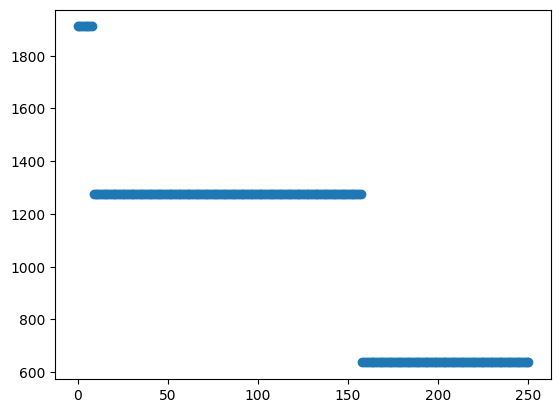

In [8]:
reports_per_mtr=pd.DataFrame(train['building_id'].value_counts().reset_index(drop=True))
reports_per_mtr=reports_per_mtr.rename(columns={'building_id':'cound'})
plt.scatter(reports_per_mtr.index,reports_per_mtr['cound'])

In [9]:
metadata.head()

,building_id,site_id,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
136,432,Trapano,143.0,Education,College Classroom,4703.0,50623.0,51.51879,-0.134556,Europe/London,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,G
137,416,Trapano,143.0,Education,College Classroom,499.3,5374.0,51.51879,-0.134556,Europe/London,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,436,Trapano,143.0,Education,College Classroom,9061.0,97532.0,51.51879,-0.134556,Europe/London,...,2005.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,F
139,441,Trapano,143.0,Education,College Laboratory,7579.0,81580.0,51.51879,-0.134556,Europe/London,...,1913.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,442,Trapano,143.0,Education,College Laboratory,5295.0,56995.0,51.51879,-0.134556,Europe/London,...,1953.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,G


Let's look at all the available columns in the metadata file:

In [10]:
metadata.columns

Index(['building_id', 'site_id', 'site_id_kaggle', 'primaryspaceusage',
       'sub_primaryspaceusage', 'sqm', 'sqft', 'lat', 'lng', 'timezone',
       'electricity', 'hotwater', 'chilledwater', 'steam', 'water',
       'irrigation', 'solar', 'gas', 'industry', 'subindustry', 'heatingtype',
       'yearbuilt', 'date_opened', 'numberoffloors', 'occupants',
       'energystarscore', 'eui', 'site_eui', 'source_eui', 'leed_level',
       'rating'],
      dtype='object')

What are the different values in site_id column?

In [11]:
print(metadata["site_id"].unique())

['Trapano' 'Gunnar' 'Vorr' 'Nymeria' 'Korv']


In [12]:
print(metadata["site_id"].value_counts())

Gunnar     147
Trapano     52
Nymeria     36
Vorr         9
Korv         7
Name: site_id, dtype: int64


In [13]:
print(metadata["yearbuilt"].unique())

[  nan 2005. 1913. 1953. 2006. 1909. 1958. 1968. 2004. 1960. 2007. 1976.
 1906. 1991. 1989. 1900. 1995. 1956. 1930. 1998. 1967. 1919. 1977. 1955.
 1997. 1970. 1928. 1965. 1907. 1966. 1945. 2013. 1902. 1915. 1937. 2000.
 1994. 2012. 1936. 1954. 1996.]


In [14]:
print(metadata["yearbuilt"].value_counts())

1976.0    76
1966.0    32
1919.0    29
1945.0    10
1960.0     6
1906.0     3
1956.0     2
1995.0     2
1900.0     2
1930.0     2
1967.0     2
2004.0     2
1968.0     2
1958.0     2
2006.0     2
1902.0     1
1915.0     1
2013.0     1
2000.0     1
1937.0     1
1965.0     1
1994.0     1
2012.0     1
1936.0     1
1954.0     1
1907.0     1
2005.0     1
1928.0     1
1970.0     1
1997.0     1
1955.0     1
1977.0     1
1913.0     1
1998.0     1
1989.0     1
1991.0     1
2007.0     1
1909.0     1
1953.0     1
1996.0     1
Name: yearbuilt, dtype: int64


Many values, probably too difficult to understand anything this way. We do see a nan value (missing value). There are many columns to look at, probably too many to make a manual check for them.

Let's take a look at the columns that have a few (less than 5, since 5 is the number of different building sites) unique values:

In [15]:
for c in metadata.columns:
    print(c, len(metadata[c].unique()))
    if len(metadata[c].unique())<5:
        print("\t\t", metadata[c].unique())
        print("------------------") # separator to read the results by column more clearly

building_id 251
site_id 5
site_id_kaggle 4
		 [143.  52.  nan  13.]
------------------
primaryspaceusage 12
sub_primaryspaceusage 26
sqm 245
sqft 245
lat 5
lng 5
timezone 2
		 ['Europe/London' 'Europe/Dublin']
------------------
electricity 2
		 ['Yes' nan]
------------------
hotwater 2
		 [nan 'Yes']
------------------
chilledwater 1
		 [nan]
------------------
steam 1
		 [nan]
------------------
water 2
		 [nan 'Yes']
------------------
irrigation 1
		 [nan]
------------------
solar 1
		 [nan]
------------------
gas 2
		 [nan 'Yes']
------------------
industry 4
		 ['Education' 'Government' 'Hospitality' 'Healthcare']
------------------
subindustry 12
heatingtype 13
yearbuilt 41
date_opened 1
		 [nan]
------------------
numberoffloors 15
occupants 101
energystarscore 1
		 [nan]
------------------
eui 1
		 [nan]
------------------
site_eui 1
		 [nan]
------------------
source_eui 1
		 [nan]
------------------
leed_level 1
		 [nan]
------------------
rating 10


### Let's clean a bit

![data cleaning](https://img.freepik.com/premium-photo/messy-kitchen-with-dirty-dishes-counter-dishes-counter-generative-ai_97167-9229.jpg)

 our data ^^

### Dropping meaningless columns

In [16]:
for c in metadata.columns:
    if len(metadata[c].unique())==1:
        print("Useless:", c)


Useless: chilledwater
Useless: steam
Useless: irrigation
Useless: solar
Useless: date_opened
Useless: energystarscore
Useless: eui
Useless: site_eui
Useless: source_eui
Useless: leed_level


Dropping a column:

In [17]:
metadata = metadata.drop(columns=["site_id_kaggle"])

In [18]:
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
136,432,Trapano,Education,College Classroom,4703.0,50623.0,51.51879,-0.134556,Europe/London,Yes,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,G
137,416,Trapano,Education,College Classroom,499.3,5374.0,51.51879,-0.134556,Europe/London,Yes,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,436,Trapano,Education,College Classroom,9061.0,97532.0,51.51879,-0.134556,Europe/London,Yes,...,2005.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,F
139,441,Trapano,Education,College Laboratory,7579.0,81580.0,51.51879,-0.134556,Europe/London,Yes,...,1913.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,442,Trapano,Education,College Laboratory,5295.0,56995.0,51.51879,-0.134556,Europe/London,Yes,...,1953.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,G


#### 🧩 Task I - Dropping useless columns

Are there any other columns that you deem meaningless? Write your code here:

In [21]:
for c in metadata.columns:
   if len(metadata[c].unique())==1:
    metadata=metadata.drop([c], axis=1)
metadata.head()


,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,Trapano,Education,College Classroom,4703.0,50623.0,51.51879,-0.134556,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Steam,NaN,5.0,NaN,G
137,416,Trapano,Education,College Classroom,499.3,5374.0,51.51879,-0.134556,Europe/London,Yes,Yes,NaN,NaN,Education,College/University,Heat network,NaN,4.0,NaN,NaN
138,436,Trapano,Education,College Classroom,9061.0,97532.0,51.51879,-0.134556,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Heat network,2005.0,10.0,NaN,F
139,441,Trapano,Education,College Laboratory,7579.0,81580.0,51.51879,-0.134556,Europe/London,Yes,NaN,NaN,NaN,Education,College/University,Heat network,1913.0,5.0,NaN,NaN
140,442,Trapano,Education,College Laboratory,5295.0,56995.0,51.51879,-0.134556,Europe/London,Yes,Yes,NaN,NaN,Education,College/University,Heat network,1953.0,6.0,NaN,G


#### ⚙️ Solution

In [ ]:
for c in metadata.columns:
    if len(metadata[c].unique())==1:
        metadata = metadata.drop(columns=[c])

You can, of course drop other columns as well if you find it necessary!

In [ ]:
columns_to_drop = []  # list of column names to drop
for c in columns_to_drop:
    metadata = metadata.drop(columns=[c])

### Categorical Columns

![categorical_data](https://sdv.ghost.io/content/images/2023/01/Categorical-Data.png)

In [22]:
metadata.columns

Index(['building_id', 'site_id', 'primaryspaceusage', 'sub_primaryspaceusage',
       'sqm', 'sqft', 'lat', 'lng', 'timezone', 'electricity', 'hotwater',
       'water', 'gas', 'industry', 'subindustry', 'heatingtype', 'yearbuilt',
       'numberoffloors', 'occupants', 'rating'],
      dtype='object')

In [23]:
for c in metadata.columns:
    print(c, len(metadata[c].unique()))
    if len(metadata[c].unique())<5:
        print("---\n", metadata[c].value_counts())
    print("-------------------------")

building_id 251
-------------------------
site_id 5
-------------------------
primaryspaceusage 12
-------------------------
sub_primaryspaceusage 26
-------------------------
sqm 245
-------------------------
sqft 245
-------------------------
lat 5
-------------------------
lng 5
-------------------------
timezone 2
---
 Europe/London    215
Europe/Dublin     36
Name: timezone, dtype: int64
-------------------------
electricity 2
---
 Yes    250
Name: electricity, dtype: int64
-------------------------
hotwater 2
---
 Yes    15
Name: hotwater, dtype: int64
-------------------------
water 2
---
 Yes    16
Name: water, dtype: int64
-------------------------
gas 2
---
 Yes    137
Name: gas, dtype: int64
-------------------------
industry 4
---
 Education      163
Government      80
Healthcare       6
Hospitality      2
Name: industry, dtype: int64
-------------------------
subindustry 12
-------------------------
heatingtype 13
-------------------------
yearbuilt 41
--------------------

How to see how much each value is in procents? 250 for one value in "electricity" sounds like a lot.. 🤔

In [24]:
for c in metadata.columns:
    if len(metadata[c].unique())<5:
        print(c)
        print("---\n", metadata[c].value_counts() / metadata.shape[0])

timezone
---
 Europe/London    0.856574
Europe/Dublin    0.143426
Name: timezone, dtype: float64
electricity
---
 Yes    0.996016
Name: electricity, dtype: float64
hotwater
---
 Yes    0.059761
Name: hotwater, dtype: float64
water
---
 Yes    0.063745
Name: water, dtype: float64
gas
---
 Yes    0.545817
Name: gas, dtype: float64
industry
---
 Education      0.649402
Government     0.318725
Healthcare     0.023904
Hospitality    0.007968
Name: industry, dtype: float64


Columns that only have two values can be considered True / False columns (also called for boolean data). The easiest way to encode this data is to assign 1 and 0 values to the corresponding entries in these columns.

It can be done in the following ways:

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(metadata["water"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1])

We see that "yes" values have been transformed to 0, which might get confusing in the future. Remeber, that 0 == False and 1==True
Let's rewrite it and assign the values to metadata["water"]

In [26]:
res = le.fit_transform(metadata["water"])
1 - res  # now it's reverse, exactly as we wanted it to be

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0])

##### 🎲 Another way to write it:

In [ ]:
# metadata["water"]=="Yes" # print the output of metadata["water"]=="Yes" to understand how it works

136     False
137     False
138     False
139     False
140     False
        ...  
1631    False
1632    False
1633    False
1634    False
1635    False
Name: water, Length: 251, dtype: bool

##### Assigning values to metadata["water"] :

In [122]:
metadata["water"] = 1 - res
# metadata["water"] = metadata["water"]=="Yes" # an alternative way

#### 🧩 Task II - Encoding categorical columns

Encode the rest of the categorical columns (both the binary and multicategorical). What columns would you use? Tips: even numerical values can sometimes be categorical 😉

In [123]:
from sklearn.preprocessing import LabelEncoder

binary_Lbls =[]
categor_Lbls = []
metadata_new = metadata.copy() # I am using a copy so I dont have to renew every time i am testing

# i am considering as binary every column that has less/equal to 3 unique (yes,no,NaN) and one of them is Yes
# i am considering as categorical every column that has info in stirng and its not binary
# i read smwhere that objects in dataframes are strgs

for c in metadata.columns:

  if len(metadata[c].unique())<=3 and any(x=="Yes" for x in metadata[c].unique()):
    le=LabelEncoder()
    res =le.fit_transform(metadata_new[c])
    metadata_new[c]=1-res
    binary_Lbls.append(c)


  elif metadata[c].dtype=="object":
    le=LabelEncoder()
    res =le.fit_transform(metadata_new[c])
    metadata_new[c]=res
    categor_Lbls.append(c)

print("categor_Lbls =",categor_Lbls)
print("binary_Lbls =",binary_Lbls)


categor_Lbls = ['site_id', 'primaryspaceusage', 'sub_primaryspaceusage', 'timezone', 'industry', 'subindustry', 'heatingtype', 'rating']
binary_Lbls = ['electricity', 'hotwater', 'gas']


In [124]:
metadata_new.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,50623.0,51.51879,-0.134556,1,1,0,-7,0,0,2,11,NaN,5.0,NaN,8
137,416,3,0,2,499.3,5374.0,51.51879,-0.134556,1,1,1,-8,0,0,2,7,NaN,4.0,NaN,9
138,436,3,0,2,9061.0,97532.0,51.51879,-0.134556,1,1,0,-6,0,0,2,7,2005.0,10.0,NaN,7
139,441,3,0,3,7579.0,81580.0,51.51879,-0.134556,1,1,0,-8,0,0,2,7,1913.0,5.0,NaN,9
140,442,3,0,3,5295.0,56995.0,51.51879,-0.134556,1,1,1,-7,0,0,2,7,1953.0,6.0,NaN,8


I am trying to create a label dictionary for the encoding | maybe dataframe is not the best format creates a lot of NaNs to join uneven columns and could find the way to sort every key to the value for the different subsets but it looks visually better that the dictionary format i tried

In [125]:
dict_array_un=pd.DataFrame()
dict_array_un_sorted=pd.DataFrame()

for x in categor_Lbls:
  keys = metadata[x].unique()
  values= metadata_new[x].unique()
  dict_array=pd.DataFrame({(str(x),"keys"):keys,(str(x),"values"):values})

  dict_array_un=pd.concat([dict_array_un,dict_array], axis=1,ignore_index=False)

dict_array_un.head()


site_id                     primaryspaceusage        sub_primaryspaceusage  \
      keys values                           keys values                  keys   
0  Trapano    3.0                      Education    0.0     College Classroom   
1   Gunnar    0.0            Lodging/residential    4.0    College Laboratory   
2     Vorr    4.0  Entertainment/public assembly    1.0             Dormitory   
3  Nymeria    2.0                Public services    8.0             Gymnasium   
4     Korv    1.0                         Office    6.0               Library   

               timezone            industry                 subindustry  \
  values           keys values         keys values                 keys   
0      2  Europe/London    1.0    Education    0.0   College/University   
1      3  Europe/Dublin    0.0   Government    1.0       Animal Control   
2      7            NaN    NaN  Hospitality    3.0      Public Assembly   
3     10            NaN    NaN   Healthcare    2.0  City, County, State   
4     15            NaN    NaN          NaN    NaN      Social Services   

                     heatingtype        rating         
  values                    keys values   keys values  
0    2.0                   Steam   11.0      G    8.0  
1    0.0            Heat network    7.0    NaN    9.0  
2    9.0                     Oil   10.0      F    7.0  
3    1.0                     Gas    5.0      E    6.0  
4   10.0  Heat network and steam    8.0      B    1.0

#### ⚙️ Solution

In [ ]:
label_dict = {}  # optional, to be able to come back to the original labels
categorical_columns = [ "site_id", "primaryspaceusage", "sub_primaryspaceusage",
                       "lat", "lng",
                       "timezone", "electricity", "hotwater",  "gas", "industry",
                       "subindustry", "heatingtype"]
yes_no_columns = ["gas", "hotwater"]

for c in categorical_columns:
    le = LabelEncoder()
    res = le.fit_transform(metadata[c])
    if c in yes_no_columns:
        res = 1-res  # make sure Yes becomes 1
    label_dict[c] = le
    metadata[c] = res

#### Ordinal values

In [32]:
metadata["rating"].unique()

array(['G', nan, 'F', 'E', 'B', 'D', 'C', 'A', 'C1', 'D1'], dtype=object)

Since there are just a few of rating values, let's encode them manually:

In [ ]:
encoding = {'A': 9, 'B': 8, 'C': 7, 'C1': 6, 'D': 5, 'D1':4, 'E':3, 'F':2, 'G':1}


In [ ]:
metadata["rating"] = metadata["rating"].replace(encoding)

And finally let's set missing values (nan) as a separate category: 0.

We will work more with missing values in [the next notebook](./02_missing_data.ipynb) :

In [ ]:
metadata["rating"].loc[metadata["rating"].isna()] = 0

/tmp/ipykernel_32270/4190443919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["rating"].loc[metadata["rating"].isna()] = 0


Let's look at our encoded values:

In [ ]:
metadata["rating"].unique()

array([1., 0., 2., 3., 8., 5., 7., 9., 6., 4.])

### Duplicate features

![duplicate features illustration](https://cdn.artphotolimited.com/images/64a3eedabd40b89aa05483f5/300x300/agent-smith-clones.jpg)

Looking at correlation between all the columns:

In [126]:
metadata_new.corr()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
building_id,1.000000,0.777420,0.487522,-0.206625,0.312475,0.312475,0.602920,0.803423,-0.595416,0.003282,0.187493,-0.516624,-0.553022,-0.222546,-0.780666,0.622615,-0.072478,0.588559,-0.063499,0.516624
site_id,0.777420,1.000000,0.287936,-0.351996,0.323068,0.323067,0.285532,0.623616,-0.275087,0.049880,0.353641,-0.363608,-0.607395,-0.276156,-0.614748,0.397104,-0.094066,0.779264,-0.005716,0.363608
primaryspaceusage,0.487522,0.287936,1.000000,0.172577,-0.008666,-0.008667,0.068072,0.172643,-0.065445,-0.078734,0.028428,-0.299572,-0.363764,0.323773,-0.441527,0.065072,-0.087075,0.273627,-0.232932,0.299572
sub_primaryspaceusage,-0.206625,-0.351996,0.172577,1.000000,-0.162133,-0.162133,-0.267232,-0.371918,0.262133,-0.037596,-0.175639,0.235667,0.247868,-0.074188,0.314158,-0.301946,-0.167929,-0.269851,0.311069,-0.235667
sqm,0.312475,0.323068,-0.008666,-0.162133,1.000000,1.000000,0.204647,0.306423,-0.201420,0.055822,0.102642,-0.045534,-0.103342,-0.058156,-0.227132,0.167083,0.047399,0.562444,0.723591,0.045534
sqft,0.312475,0.323067,-0.008667,-0.162133,1.000000,1.000000,0.204646,0.306423,-0.201419,0.055822,0.102642,-0.045533,-0.103341,-0.058156,-0.227132,0.167082,0.047399,0.562443,0.723591,0.045533
lat,0.602920,0.285532,0.068072,-0.267232,0.204647,0.204646,1.000000,0.919513,-0.999908,0.026458,-0.097303,-0.420464,-0.137889,-0.278736,-0.416958,0.902016,0.061987,-0.045582,-0.005716,0.420464
lng,0.803423,0.623616,0.172643,-0.371918,0.306423,0.306423,0.919513,1.000000,-0.914551,0.042467,0.067429,-0.494526,-0.380346,-0.297810,-0.605860,0.870359,-0.026432,0.481436,-0.005716,0.494526
timezone,-0.595416,-0.275087,-0.065445,0.262133,-0.201420,-0.201419,-0.999908,-0.914551,1.000000,-0.025880,0.103162,0.416989,0.128971,0.276607,0.408475,-0.900492,NaN,0.064094,NaN,-0.416989
electricity,0.003282,0.049880,-0.078734,-0.037596,0.055822,0.055822,0.026458,0.042467,-0.025880,1.000000,0.015945,-0.039365,-0.057693,-0.066746,0.082868,0.028542,-0.042167,0.062176,0.088121,0.039365


Confusing, difficult to make sense of this table. Let's visualize it:

<Axes: >

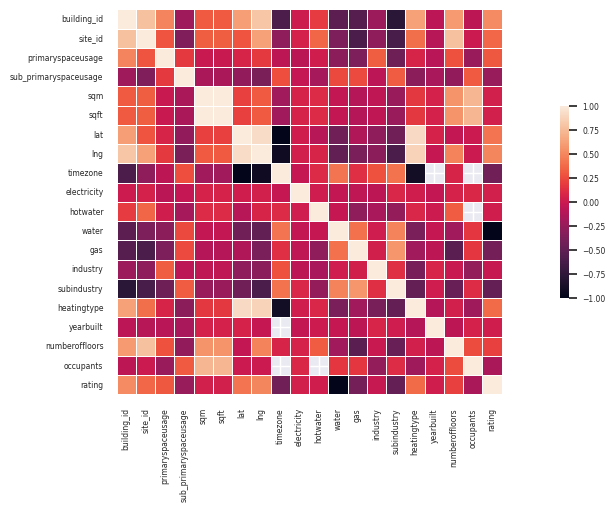

In [127]:
# graphical settings, optional
sns.set(font_scale=0.5, rc={'figure.figsize':(15,5)})
# cmap = sns.diverging_palette(20, 250, as_cmap=True)

# code to produce the diagram:
sns.heatmap(metadata_new.corr(),
            # cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

We can see that (as expected) lat and lng have a high correlation with each other as well as with the timezone. Why is that? What should we do (or not do about it)?

Logically we can derive that these columns tell us the same information in different ways. Of course, different site_ids will have different lat and lon, but same site_id will have the same lat and lon. The best practice is usually removing columns that do not communicate any additional value to us. Which columns could we remove without losing too much information?

Some useful functions for looking into data:

In [ ]:
metadata["heatingtype"].value_counts()

heatingtype
5     172
12     36
7      24
2       5
4       3
11      2
10      2
3       2
8       1
9       1
0       1
1       1
6       1
Name: count, dtype: int64

In [ ]:
metadata.loc[metadata["timezone"]!=1]["heatingtype"].unique()  # choosing only the part of the table where timezone is not 1

array([12])

In [ ]:
metadata[["timezone", "yearbuilt"]].groupby("timezone", as_index=False).mean()

,timezone,yearbuilt
0,0,NaN
1,1,1960.592965


#### 🧩 Task III - Dropping correlating columns

I am trying to automaticly seach for pairs with high correlation (>0.9,<-0.9) and then group the unique keys because maybe more that one are corralatted from the groups

Then I can either deside manually which one gives me more information to keep or pick a random one and drop the rest

In [128]:
pair_list=[]

for i in range(0,12):
  for y in range(0,12):
    if (metadata_new.corr().iloc[i,y]>0.9 or metadata_new.corr().iloc[i,y]<-0.9) and metadata_new.corr().iloc[i,y]!=1 :
      pair_list=pair_list+[(sorted([metadata_new.corr().columns[i], metadata_new.corr().columns[y]]))]

print(pair_list)

[['sqft', 'sqm'], ['sqft', 'sqm'], ['lat', 'lng'], ['lat', 'timezone'], ['lat', 'lng'], ['lng', 'timezone'], ['lat', 'timezone'], ['lng', 'timezone']]


In [129]:
 groups = []

 for pair in pair_list:
  added_to_group = False
  for group in groups:
    if any(variable in group for variable in pair):
      group.extend(pair)
      group = list(set(group))
      added_to_group = True
      break

  if not added_to_group:
    groups.append(pair)

result = [list(set(group)) for group in groups]

print(result)

[['sqm', 'sqft'], ['lng', 'lat', 'timezone']]


I am picking randomly here the last item. maybe that is not the best

In [130]:
columns_to_drop = sum([x[0:-1] for x in result],[])

metadata_new =metadata_new.drop(columns=columns_to_drop)

metadata_new.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqft,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,50623.0,1,1,0,-7,0,0,2,11,NaN,5.0,NaN,8
137,416,3,0,2,5374.0,1,1,1,-8,0,0,2,7,NaN,4.0,NaN,9
138,436,3,0,2,97532.0,1,1,0,-6,0,0,2,7,2005.0,10.0,NaN,7
139,441,3,0,3,81580.0,1,1,0,-8,0,0,2,7,1913.0,5.0,NaN,9
140,442,3,0,3,56995.0,1,1,1,-7,0,0,2,7,1953.0,6.0,NaN,8


#### ⚙️ Solution

In [ ]:
columns_to_drop = ["lat", "lng", "sqft"]

metadata = metadata.drop(columns=columns_to_drop)

### Correlation with the target

Don't forget that all this time we have only looking at buildings' metadata! Our goal is **to predict** how these buildings would behave in terms of energy consumption. Let's look at the correlation in the train dataset:

<Axes: >

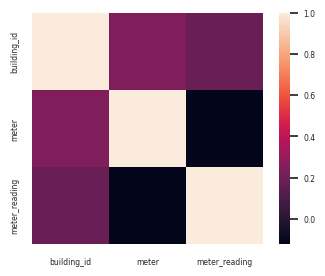

In [ ]:
# graphical settings, optional
sns.set(font_scale=0.5, rc={'figure.figsize':(4,3)})

# code to produce the diagram:
sns.heatmap(train[["building_id", "meter", "meter_reading"]].corr(),
            square=True)

Ok, so our meter type doesn't correlate with our target value. Building Id on the other hand does have some correlation with the target

<Axes: >

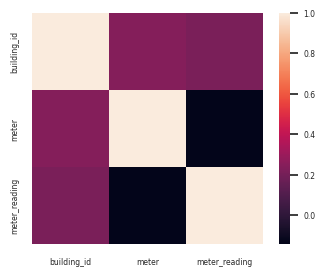

In [ ]:
sns.heatmap(train[["building_id", "meter", "meter_reading"]].groupby(["building_id", "meter"], as_index=False).mean().corr(), square=True)

<Axes: >

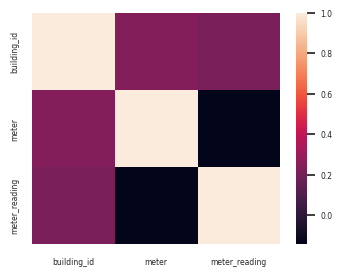

In [ ]:
sns.heatmap(train[["building_id", "meter", "meter_reading"]].groupby(["building_id", "meter"], as_index=False).sum().corr())

### Comparing two dataframes

In [ ]:
full_df = train.merge(metadata, on='building_id', how='left')
full_df.head()

,building_id,day,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
0,2,2016-02-02,595,102.6,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,NaN,3.0
1,2,2016-02-02,207,0.3,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,NaN,3.0
2,2,2016-02-03,595,88.8,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,NaN,3.0
3,2,2016-02-03,207,0.1,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,NaN,3.0
4,2,2016-02-04,595,76.3,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,NaN,3.0


#### 🧩 Task IV - Correlation between the features and the target

Can you see any patterns in this diagram? What information does it provide regarding the given buildings?

<Axes: >

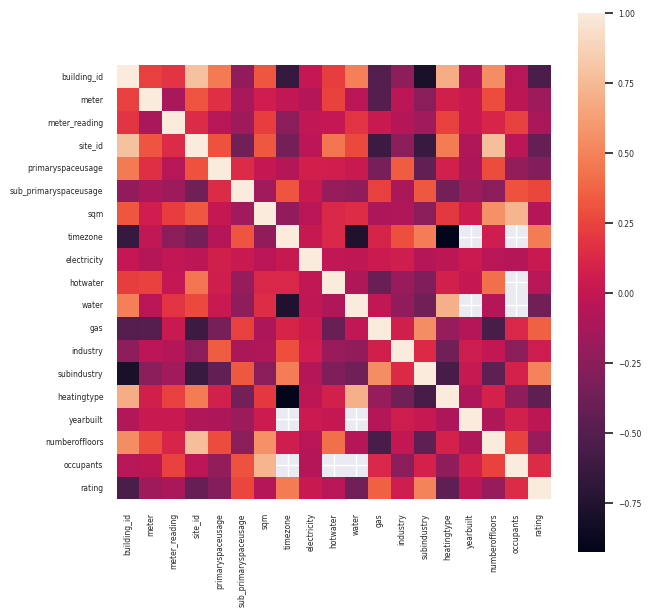

In [ ]:
sns.set(font_scale=0.5, rc={'figure.figsize':(7,7)})
sns.heatmap(full_df.drop(columns=[ "day"]).corr(), square=True)

In [ ]:
columns_to_drop = # Your code here

metadata = metadata.drop(columns=columns_to_drop)

#### ⚙️ Solution


Answer:
* site_id correlates with the number of floors, which means that most of the buildings on one site are similar in their height
* heatingtype correlates with site_id and timezone; we have already noticed that one timezone is characterized of one particular heating type; now we can see that it even correlates with gas and water;
* features that have strongest correlation with the target value are occupants, heatingtype, sqm
* ...

### 🎢 Saving our work

In [ ]:
full_df.to_csv("../kaggle_data/tutorial_results/01.csv")
metadata.to_csv("../kaggle_data/tutorial_results/01_metadata.csv")

## Resources